# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url for call
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {'appid': weather_api_key,
          'units': 'imperial'}


In [4]:
count = 0
city_weather = []

print(f'Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    print(f'Processing Record {count} | {city.title()}')

    count += 1
    # Set URL paramaters
    params['q'] = city.title()
    
    try:
        # Build query URL
        weather_response = requests.get(url = url, params = params)
        request_url = weather_response.url
        weather_data = weather_response.json()
        weather = {}
        weather['City'] = city
        weather['Lat'] = weather_data['coord']['lat']
        weather['Lng'] = weather_data['coord']['lon']
        weather['Max Temp'] = weather_data['main']['temp_max']
        weather['Humidity'] = weather_data['main']['humidity']
        weather['Cloudiness'] = weather_data['clouds']['all']
        weather['Wind Speed'] = weather_data['wind']['speed']
        weather['Country'] = weather_data['sys']['country']
        weather['Date'] = weather_data['dt']
        city_weather.append(weather)
    except:
        print(f'City not found. Skipping...')
        continue


print('-----------------------------')
print('Data Retrieval Complete') 
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 0 | Ushuaia
Processing Record 1 | Vilyuysk
Processing Record 2 | Khatanga
Processing Record 3 | Saleaula
City not found. Skipping...
Processing Record 4 | Sao Joao Da Barra
Processing Record 5 | Georgetown
Processing Record 6 | Yellowknife
Processing Record 7 | Rikitea
Processing Record 8 | Mataura
Processing Record 9 | Otane
Processing Record 10 | Cape Town
Processing Record 11 | Tecpan
Processing Record 12 | Tasiilaq
Processing Record 13 | Punta Arenas
Processing Record 14 | Mys Shmidta
City not found. Skipping...
Processing Record 15 | Umm Lajj
Processing Record 16 | Kungurtug
Processing Record 17 | Turkan
Processing Record 18 | Vaini
Processing Record 19 | Camp Verde
Processing Record 20 | Puerto Ayora
Processing Record 21 | Ribeira Grande
Processing Record 22 | Atuona
Processing Record 23 | Jamestown
Processing Record 24 | Albany
Processing Record 25 | Port Alfred
Processing Record 26 | Puquio
Processing Reco

Processing Record 231 | Bonga
Processing Record 232 | Dharmanagar
Processing Record 233 | Codrington
Processing Record 234 | Manokwari
Processing Record 235 | Necochea
Processing Record 236 | Dong Hoi
Processing Record 237 | Port-Gentil
Processing Record 238 | Sao Jose Da Coroa Grande
Processing Record 239 | Asau
Processing Record 240 | Cap Malheureux
Processing Record 241 | Serowe
Processing Record 242 | Smithers
Processing Record 243 | Lindi
Processing Record 244 | La Ronge
Processing Record 245 | Yertsevo
Processing Record 246 | Huntington
Processing Record 247 | Hami
Processing Record 248 | Ambovombe
Processing Record 249 | Carnarvon
Processing Record 250 | Iqaluit
Processing Record 251 | Hue
Processing Record 252 | Krasnoselkup
Processing Record 253 | Longyearbyen
Processing Record 254 | Poum
Processing Record 255 | Japura
Processing Record 256 | Rauma
Processing Record 257 | Sechura
Processing Record 258 | Fengrun
Processing Record 259 | Todos Santos
Processing Record 260 | Mamly

Processing Record 462 | Gorom-Gorom
Processing Record 463 | Angoche
Processing Record 464 | Umm Kaddadah
Processing Record 465 | Atar
Processing Record 466 | Satitoa
City not found. Skipping...
Processing Record 467 | Leh
Processing Record 468 | Indramayu
Processing Record 469 | Korla
Processing Record 470 | Kalmunai
Processing Record 471 | Riverton
Processing Record 472 | Shunyi
Processing Record 473 | Feodosiya
Processing Record 474 | Holme
Processing Record 475 | Byron Bay
Processing Record 476 | Skalistyy
City not found. Skipping...
Processing Record 477 | Deputatskiy
Processing Record 478 | Itaueira
Processing Record 479 | Samana
Processing Record 480 | Severomuysk
Processing Record 481 | Pulandian
Processing Record 482 | Alcaniz
Processing Record 483 | Rawson
Processing Record 484 | Matara
Processing Record 485 | Resistencia
Processing Record 486 | Linjiang
Processing Record 487 | Praia Da Vitoria
Processing Record 488 | Tara
Processing Record 489 | Tuensang
Processing Record 490

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame with raw data from API call
city_weather_df = pd.DataFrame(city_weather)

# Display DataFrame
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,47.82,57,75,23.02,AR,1632781605
1,vilyuysk,63.7553,121.6247,30.00,95,20,8.75,RU,1632781605
2,khatanga,71.9667,102.5000,26.46,80,56,7.78,RU,1632781454
3,sao joao da barra,-21.6403,-41.0511,72.81,86,85,16.71,BR,1632781606
4,georgetown,5.4112,100.3354,78.73,93,20,1.01,MY,1632781606
...,...,...,...,...,...,...,...,...,...
556,boa vista,2.8197,-60.6733,91.38,49,40,5.75,BR,1632781811
557,lusambo,-4.9667,23.4500,69.42,96,82,1.48,CD,1632781811
558,marienburg,54.0359,19.0266,55.96,74,49,8.93,PL,1632781755
559,statesboro,32.4488,-81.7832,84.51,42,40,0.00,US,1632781812


In [15]:
# Round Lat and Lng to 2 decimal places
city_weather_df['Lat'] = round(city_weather_df['Lat'],2)
city_weather_df['Lng'] = round(city_weather_df['Lng'],2)

city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waipawa,-41.41,175.52,47.44,85,100,10.58,NZ,1632774571
1,butaritari,3.07,172.79,83.57,73,88,19.42,KI,1632774572
2,cherskiy,68.75,161.30,23.43,89,100,12.62,RU,1632774572
3,ushuaia,-54.80,-68.30,51.46,40,40,16.11,AR,1632774449
4,ribeira grande,38.52,-28.70,70.20,78,40,12.66,PT,1632774573
...,...,...,...,...,...,...,...,...,...
558,kamuli,0.95,33.12,64.09,93,45,3.51,UG,1632774798
559,tacuarembo,-31.73,-55.98,71.29,77,0,8.41,UY,1632774799
560,mangrol,21.12,70.12,78.58,87,100,1.48,IN,1632774799
561,lamesa,32.74,-101.95,91.08,23,37,11.74,US,1632774799


In [16]:
# Save DataFrame to .csv
city_weather_df.to_csv('data/city_weather_data.csv')

In [18]:
# Create and Display summary DataFrame
summary_df = city_weather_df.describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,20.913783,21.543091,64.100462,70.253996,53.531083,7.804583,1.632775e+09
std,33.715069,89.098671,17.809495,21.019847,38.644428,5.631610,8.244048e+01
min,-54.800000,-175.200000,16.290000,8.000000,0.000000,0.000000,1.632774e+09
25%,-7.225000,-57.650000,51.790000,60.000000,14.000000,3.410000,1.632775e+09
50%,27.980000,26.690000,67.710000,76.000000,61.000000,6.850000,1.632775e+09
75%,49.550000,101.125000,77.580000,86.000000,91.500000,10.680000,1.632775e+09
max,78.220000,179.320000,97.770000,100.000000,100.000000,38.100000,1.632775e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [32]:
# Initializing count and empty list to store indexes
count = 0
humidity_indexes_to_drop = []

# Find all Indexes with Humidity over 100%
for value in city_weather_df['Humidity']:
    if value > 100 == True:
        humidity_indexes_to_drop.append(count)
        count += 1
    else:
        count += 1

# Display indexes to drop
if humidity_indexes_to_drop == []:
    print('Nothing to drop')
else:
    print(f'Drop indexes {humidity_indexes_to_drop}')


Nothing to drop


In [33]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#Skipped since no outlier values

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

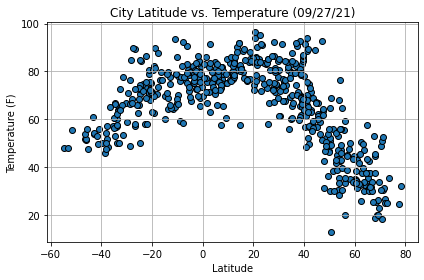

In [16]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Temperature (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

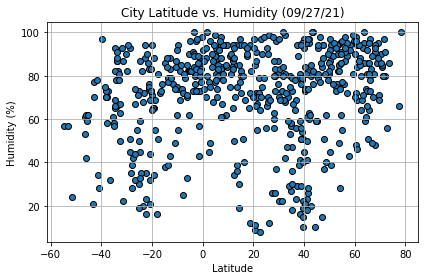

In [18]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Humidity (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

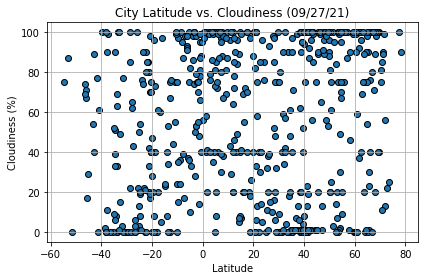

In [19]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

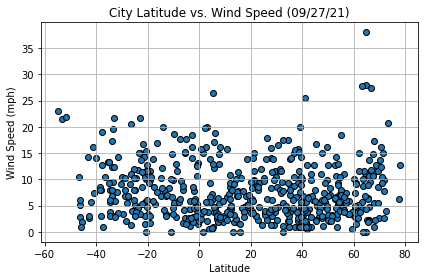

In [20]:
x_values = city_weather_df['Lat']
y_values = city_weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (09/27/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b=True, axis='both')
plt.tight_layout()
plt.savefig("images/lat_windspeed.png")
plt.show()

## Linear Regression

In [32]:
# Create bins for different Hemispheres
bins = [-90, -.1, 90]

group_names = ['Southern Hemisphere', 'Northern Hemisphere']

city_weather_df["Hemisphere"] = pd.cut(city_weather_df['Lat'], bins, 
                                  labels=group_names, include_lowest=True)

#Filter by the bins
north_df = city_weather_df[city_weather_df['Hemisphere']=="Northern Hemisphere"]
south_df = city_weather_df[city_weather_df['Hemisphere']=="Southern Hemisphere"]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,ushuaia,-54.8000,-68.3000,47.82,57,75,23.02,AR,1632781605,Southern Hemisphere
3,sao joao da barra,-21.6403,-41.0511,72.81,86,85,16.71,BR,1632781606,Southern Hemisphere
6,rikitea,-23.1203,-134.9692,73.72,72,22,21.63,PF,1632781408,Southern Hemisphere
7,mataura,-46.1927,168.8643,51.48,42,71,2.82,NZ,1632781607,Southern Hemisphere
8,otane,-39.8833,176.6333,50.02,97,100,13.98,NZ,1632781608,Southern Hemisphere
...,...,...,...,...,...,...,...,...,...,...
549,biak,-0.9131,122.8766,75.65,82,99,4.81,ID,1632781687,Southern Hemisphere
550,hoopstad,-27.8327,25.9083,66.85,28,65,5.57,ZA,1632781808,Southern Hemisphere
554,kirakira,-10.4544,161.9205,78.78,87,100,6.67,SB,1632781810,Southern Hemisphere
555,emerald,-23.5333,148.1667,71.74,68,90,14.97,AU,1632781718,Southern Hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7982924225921167


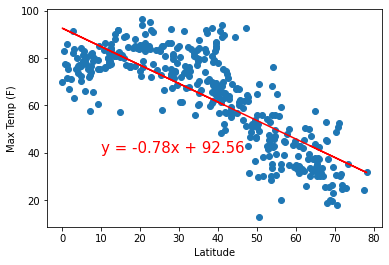

In [37]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_maxtemp_regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6988150353176444


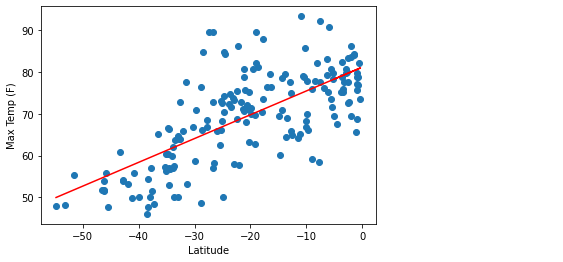

In [34]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_maxtemp_regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04105548280246077


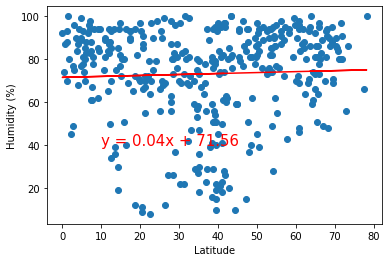

In [39]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_humidity_regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31756666790161664


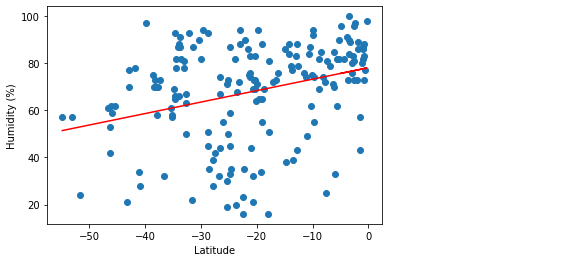

In [38]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_humidity_regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03185175401062681


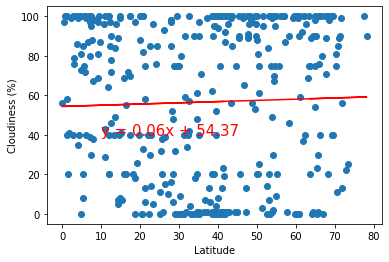

In [40]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_cloudiness_regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2689218972515164


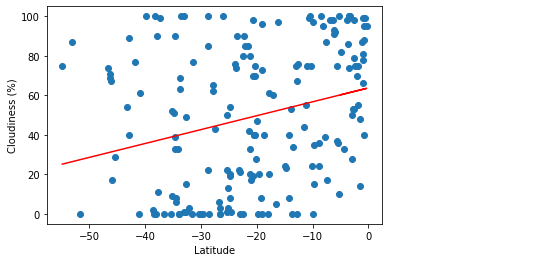

In [41]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_cloudiness_regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08776428670401587


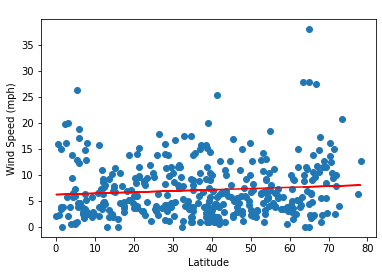

In [42]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/north_lat_windspeed_regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17599563181297215


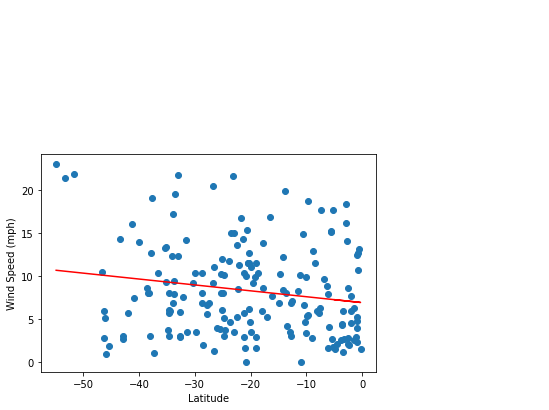

In [44]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.savefig("images/south_lat_windspeed_regression.png")
plt.show()